In [1]:
"""Design RNN or its variant including LSTM or GRU a) Select a suitable time series dataset. Example 
 predict sentiments based on product reviews b) Apply for prediction"""

'Design RNN or its variant including LSTM or GRU a) Select a suitable time series dataset. Example \n predict sentiments based on product reviews b) Apply for prediction'

In [2]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset with only the top 10,000 most common words
vocab_size = 10000
max_len = 200  # pad or truncate reviews to this length

In [4]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

In [5]:
# Pad sequences
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [6]:
# LSTM MODEL
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    LSTM(128),
    Dense(1, activation='sigmoid')  # Binary classification (positive/negative)
])

C:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [7]:
# compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 57s 342ms/step - accuracy: 0.6861 - loss: 0.5600 - val_accuracy: 0.8368 - val_loss: 0.3800
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 53s 338ms/step - accuracy: 0.8677 - loss: 0.3386 - val_accuracy: 0.8684 - val_loss: 0.3287
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 46s 291ms/step - accuracy: 0.9176 - loss: 0.2150 - val_accuracy: 0.8644 - val_loss: 0.3332
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 266ms/step - accuracy: 0.9329 - loss: 0.1850 - val_accuracy: 0.8708 - val_loss: 0.3372
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 43s 276ms/step - accuracy: 0.9535 - loss: 0.1371 - val_accuracy: 0.8664 - val_loss: 0.3519


In [9]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.8579 - loss: 0.3780
Test Accuracy: 85.81%


In [10]:
# Predict
y_pred = (model.predict(X_test) > 0.5).astype("int32")

782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step


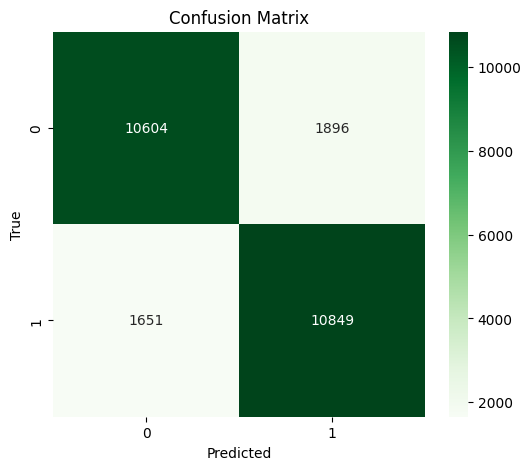

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [12]:
# Classification Report
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

              precision    recall  f1-score   support

    Negative       0.87      0.85      0.86     12500
    Positive       0.85      0.87      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000

